In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns
import re
sns.set_style("white")
%matplotlib inline

In [11]:
patient_1 = os.path.abspath(os.path.join('E:', 'Seizure_Data', 'train_2', '2_2196_0.mat'))

In [12]:
patient_1

'E:\\Seizure_Data\\train_2\\2_2196_0.mat'

In [10]:
os.path.basename(patient_1[0])

'E'

In [13]:
def mat_to_pandas(path):
    mat = loadmat(path)
    names = mat['dataStruct'].dtype.names
    ndata = {n: mat['dataStruct'][n][0, 0] for n in names}
    return pd.DataFrame(ndata['data'], columns=ndata['channelIndices'][0])    

In [7]:
files = patient_1[:4]
files

'E:\\S'

In [15]:
df = mat_to_pandas(patient_1)
# df2 = mat_to_pandas(patient_1[11])

In [25]:
df.describe()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
count,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000
mean,0.000144,-0.225929,0.014101,-0.125649,0.116721,0.076115,0.241155,0.153610,0.162858,0.021896,0.276136,0.088509,0.067820,-0.025013,-0.168659,-0.005253
std,62.591244,50.702610,36.629383,42.424613,41.469309,43.169227,42.491362,44.031261,32.523727,33.181760,33.096028,33.131872,23.997037,26.885468,23.979048,27.040439
min,-438.198456,-485.416992,-418.973419,-456.291168,-311.532410,-953.640198,-773.774475,-1039.610718,-282.172302,-230.979950,-262.053070,-286.841919,-160.716095,-308.391174,-156.482254,-328.190033
25%,-24.198442,-13.417006,-14.973419,-19.291168,-17.532425,-14.640181,-10.774501,-11.610771,-13.172308,-11.979947,-11.053060,-10.841905,-10.716088,-12.391171,-11.482251,-10.190037
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.801558,16.582993,14.026581,17.708832,16.467575,16.359819,15.225499,16.389229,13.827692,15.020053,14.946940,16.158096,10.283912,12.608829,10.517749,10.809963
max,348.801544,472.583008,372.026581,253.708832,479.467590,275.359833,237.000000,265.389221,245.827698,323.020050,231.000000,159.158096,216.283905,228.608826,223.517746,191.809967


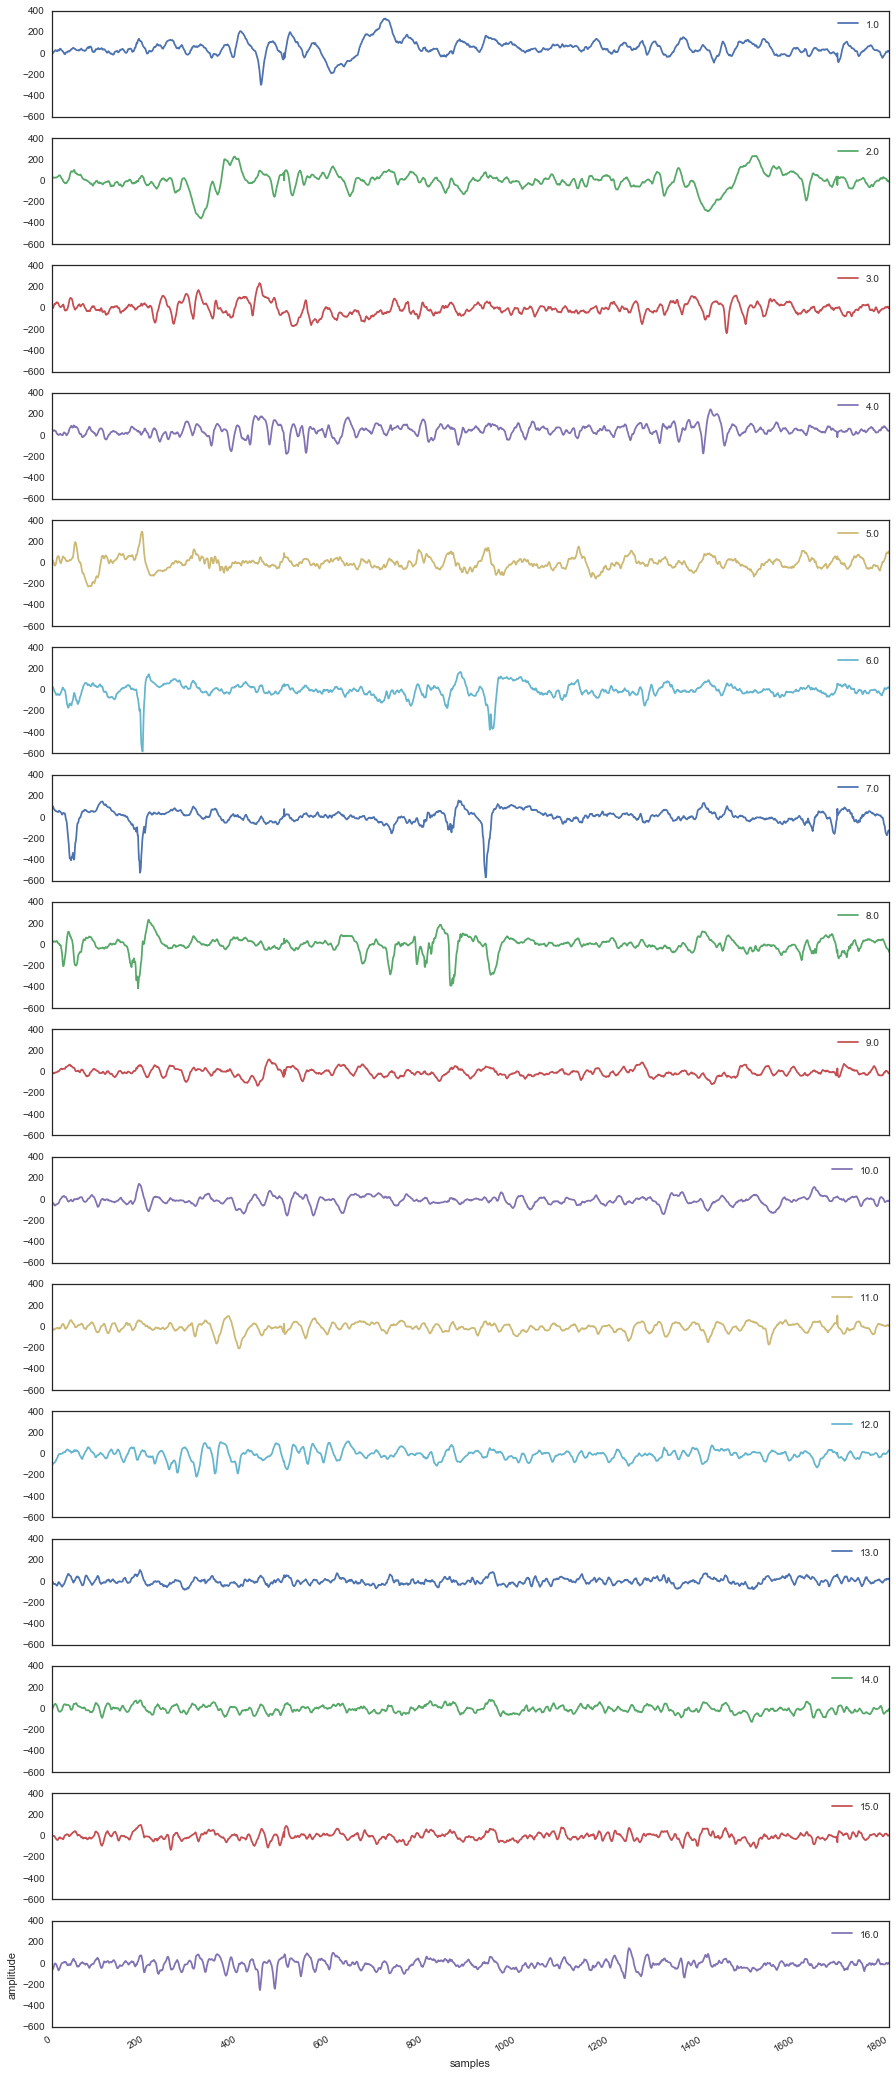

In [17]:
df[0:1800].plot(subplots=True, figsize=(15,40), sharex=True, sharey=True)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.show()

In [18]:
df2[0:1800].plot(subplots=True, figsize=(15,40))
plt.show()

NameError: name 'df2' is not defined

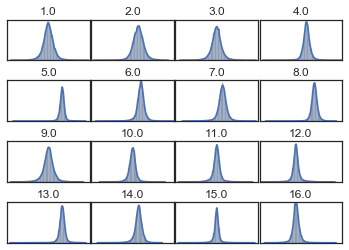

In [66]:
fig = plt.figure()

for col in df.columns:
    i = int(col)
    plt.subplots_adjust(wspace=.02, hspace=.5)
    ax = fig.add_subplot(4,4,i)
    sns.distplot(df[col])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(col)

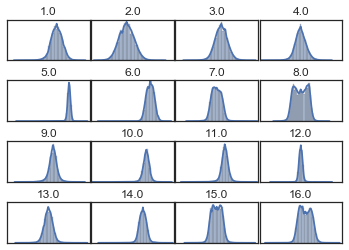

In [12]:
fig = plt.figure()

for col in df2.columns:
    i = int(col)
    plt.subplots_adjust(wspace=.02, hspace=.5)
    ax = fig.add_subplot(4,4,i)
    sns.distplot(df2[col])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(col)

In [13]:
df.describe().loc[['mean','std', 'min', 'max']]

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
mean,0.000013,0.018979,0.110020,-0.070512,0.121365,-0.086002,-0.047102,-0.205388,-0.123931,-0.229047,-0.245933,0.287039,0.369900,0.295848,0.203607,0.048189
std,38.211167,45.706164,52.032578,63.449481,58.839431,47.175754,37.482203,33.695529,50.692685,51.417274,57.203424,85.750028,69.802109,67.727398,65.477401,40.165204
min,-266.322968,-370.829498,-348.481537,-734.352539,-1063.434082,-540.044617,-334.951447,-527.359985,-357.402863,-470.171356,-548.290710,-747.334839,-1128.860718,-684.486328,-738.502197,-340.260590
max,283.677032,244.170517,373.518463,583.647461,503.565918,383.955383,276.048553,231.639984,328.597137,463.828644,511.709259,834.665161,505.139313,391.513672,731.497803,428.739410


In [14]:
df2.describe().loc[['mean','std', 'min', 'max']]

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
mean,0.000156,0.082317,0.219471,-0.062844,0.077141,-0.115376,0.016216,-0.312451,-0.078153,-0.214814,-0.224584,0.262993,0.307152,0.285710,0.223638,-0.066829
std,34.300165,31.374385,33.381969,39.705007,29.327620,32.469536,35.212285,48.251101,23.357806,23.422390,22.468556,27.499286,31.740264,36.602621,36.524438,32.190854
min,-250.567230,-130.888260,-198.811386,-289.699188,-1020.972595,-436.292511,-213.163773,-188.000000,-204.709824,-388.105286,-262.437073,-440.564972,-234.125793,-424.051971,-225.245941,-212.055298
max,165.432770,157.111740,179.000000,217.300812,351.027435,169.707504,286.836243,196.236343,169.290176,180.894730,190.562927,449.435028,275.874207,281.948029,270.754059,178.944702


In [15]:
fnames = os.listdir(os.path.abspath(os.path.join('E:', 'Seizure_Data', 'train_1')))

In [16]:
def get_label(path):
    '''
    splits file name into patient, sample, label
    '''
    fname = os.path.basename(path)
    split = re.sub('.mat', '', name).split('_')
    return split

In [17]:
labels = map(get_label, fnames)

In [18]:
labels_df = pd.DataFrame(labels, columns=['patient', 'sample', 'label'])

In [19]:
labels_df = labels_df.apply(pd.to_numeric).sort_values('sample')

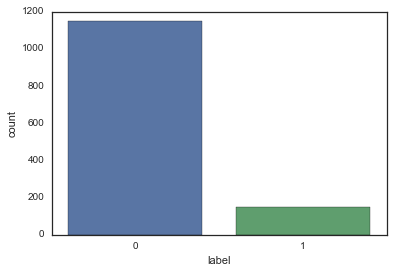

In [20]:
sns.countplot(labels_df['label'])

In [21]:
labels_df['label'].value_counts(normalize=True)

0    0.884793
1    0.115207
Name: label, dtype: float64

In [22]:
labels_df['label'].value_counts()

0    1152
1     150
Name: label, dtype: int64

In [23]:
df_fft = pd.DataFrame(np.fft.rfft(df))

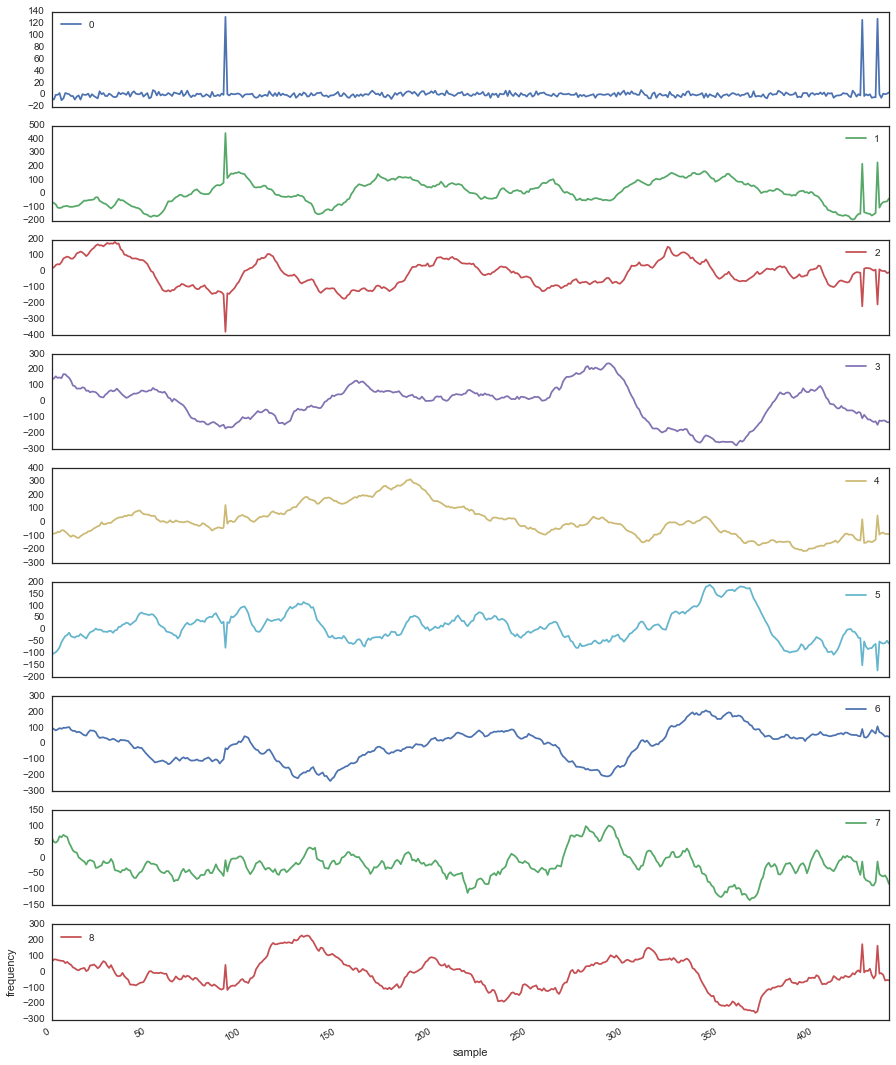

In [61]:
df_fft[0:440].plot(subplots=True, figsize=(15, 20))
plt.xlabel('sample')
plt.ylabel('frequency')
plt.show()

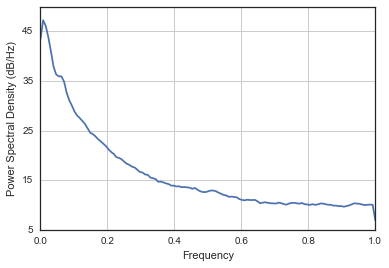

In [25]:
plt.psd(df[1.0])
plt.show()

In [26]:
def fft(time_data):
    return np.log10(np.absolute(np.fft.rfft(time_data)[:,1:48]))


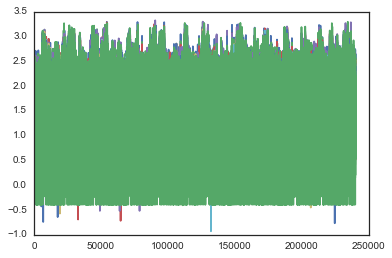

In [43]:
fft(df)

In [72]:
x, y = df[1.0], np.array([0])

try 1d conv net with average pooling per channel

In [73]:
from scipy import signal

In [90]:
X = pd.DataFrame(signal.resample(df, 600, window=400))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000004884908D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000488FFDE10>], dtype=object)

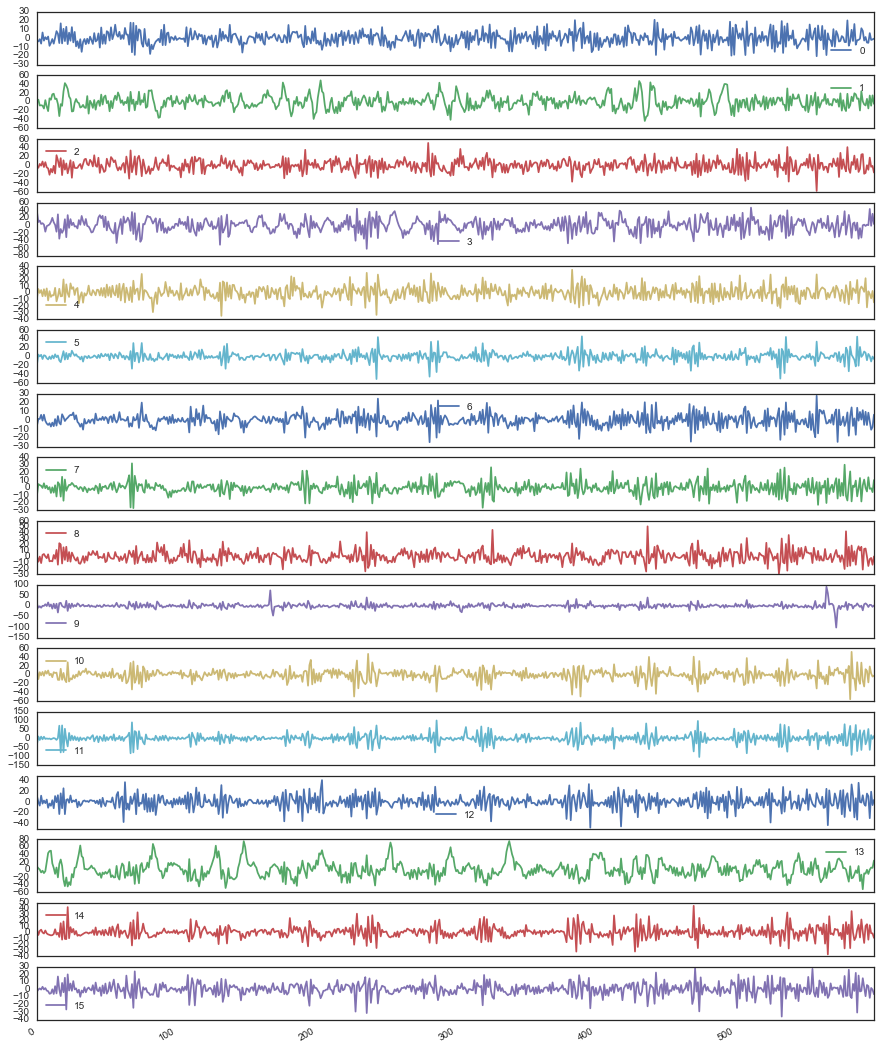

In [89]:
X.plot(subplots=True, figsize=(15, 20))

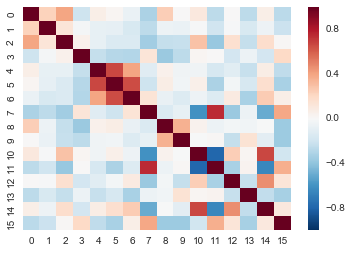

In [96]:
sns.heatmap(X.corr())

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [107]:
X = X.values.flatten('F')

In [111]:
def preprocess(sample):
    return signal.resample(sample, 600, window=400).flatten('F')

In [112]:
X_neg = preprocess(df2)

In [118]:
X_train = np.array([X, X_neg])
X_train.shape

(2L, 9600L)

In [12]:
import numpy as np

In [41]:
from data_utils import load_data
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%time X, y, files = load_data('train_1')

loading 1302 with 7 processes.
Wall time: 4min 35s


In [13]:
X.shape, y.shape, np.array(files).shape

((1302L,), (1302L,), (1302L,))

In [24]:
y[0:20]

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0'], 
      dtype='|S1')

In [17]:
files[0]

'1_1000_0.mat'

In [23]:
files[0:20]

['1_1000_0.mat',
 '1_1001_0.mat',
 '1_1002_0.mat',
 '1_1003_0.mat',
 '1_1004_0.mat',
 '1_1005_0.mat',
 '1_1006_0.mat',
 '1_1007_0.mat',
 '1_1008_0.mat',
 '1_1009_0.mat',
 '1_100_0.mat',
 '1_100_1.mat',
 '1_1010_0.mat',
 '1_1011_0.mat',
 '1_1012_0.mat',
 '1_1013_0.mat',
 '1_1014_0.mat',
 '1_1015_0.mat',
 '1_1016_0.mat',
 '1_1017_0.mat']

In [62]:
import multiprocessing as mp
mp.cpu_count()-1

7

In [38]:
X

array([ array([-3.83560201, -3.73302969, -1.2592678 , ...,  1.66197917,
       -0.52123215, -6.55193539]),
       array([-13.31237926,   0.13792862,  -1.12340676, ...,  -8.09907131,
        -1.43816888,  -6.25776121]),
       array([ -6.28448692,  -0.31209375,  -1.13483622, ...,  -9.80913631,
        10.8641398 ,  -3.36032087]),
       ...,
       array([-4.49071751,  1.25527644, -0.7313095 , ...,  2.86947668,
       -0.39316559, -2.25117248]),
       array([ 1.35474089, -2.13972241,  1.96806871, ...,  8.54187525,
        0.48609928, -1.55175021]),
       array([-9.39580758,  2.81914625,  3.65320609, ...,  5.94135714,
        1.36374735,  4.78396765])], dtype=object)

In [39]:
y.shape

(1302L,)

In [40]:
y

array(['0', '0', '0', ..., '1', '0', '1'], 
      dtype='|S1')